# Алгоритм Шеннона Фано
ВНИМАНИЕ! ЭТО НЕЭФФЕКТИВНАЯ РЕАЛИЗАЦИЯ АЛГОРИТМА, ЭТОТ ЭКЗЕМПЛЯР СОЗДАН ДЛЯ ТОГО, ЧТОБЫ НАИЛУЧШИМ ОБРАЗОМ ПОКАЗАТЬ КАК РАБОТАЕТ САМ АЛГОРИТМ!

Приложение представляет из себя кодер (преобразовывет из текста зашифрованное сообщение) и декодер (преобразет из шифра и кодировки сообщение), а так же инструмент для удобной визуализации результатов преобразования информации. Эти возможности представленны в классе ShennonFanoCoderDecoder, который хранит в себе информацию о полученной кодировке, шифр (который получается из преобразования текста или который можно считать из файла) и наконец текст (который мы декодировали или получили из файла). 

## Модули класса
Мой класс мысленно разделён на 3 инструмента (модуля). Первый - это кодер, второй - декодер и третий - модуль визуализации информации. 

### Модуль кодера
Этот модуль позволит преобразовать текст из файла, или текст из командной строки в шифр с помощью метода Шеннона Фано. В результате вычислений мы получим получившийся шифр и кодировку. После этого можно будет её визуализировать с помощью нашего третьего модуля о котором мы поговорим позже. Минимальное кол-во чисел в кодировке можно контролировать (Если нам нужно определённое число бит для нашей кодировки, то мы можем обозачить это, но количество бит может быть больше чем то число, которое мы поставили). Если требуется, то результат кодирования можно записать в файл.

### Модуль декодера
Этот модуль позволяет считать файл или 2 файла с шифром и кодировкой (внимание, в функции будет два аргумента для файлов, если у вас в файле уже есть шифр и кодировка, то второй файл заменит эту кодировку). В результате мы получим декодированный текст, который мы уже сможем визуализировать с помощью модуля визуализации. Если требуется, то результат кодирования можно записать в файл.

### Модуль визуализации информации
И наконец модуль визуализации позволит нам наглядно увидеть результаты кодирования/декодирования входной информации. Когда вы запустили функцию кодера или декодера, то вы можете посмотреть результат их работы с помощью функции визуализации результатов. Что этот модуль выводит? 

1) Таблицу с кодировкой. В таблице будут столбцы с символами, частотой повторения, код для данного символа

2) Текст, который мы расшифровали или получили из файла

3) Шифр для текста, который мы считали из файла или получили с помощью декодирования

In [107]:
import numpy as np
import pandas as pd

# Класс Кодера-Декодера методом Шеннона-Фано
class ShennonFanoEncoderDecoder():

    def __init__(self):
        """Конструктор класса, здесь инициализируется наш шифр, кодировка и текст"""
        self.code = np.array([]) # В этой переменной будет хранится шифр нашего текста
        self.encoding = pd.DataFrame(columns=["Частота", "Код символа"]) # В этой таблице будет хранится информация о нашей кодировке
        self.text = "" # А здесь будет храниться текст (расшифрованный или полученный для шифрования)
        pass

    def get_file_to_encode(self, file_with_text, code_minimal_length=1, code_maximal_length=None, result_file_path=None):
        """Кодирует текст, записанный в txt файл"""
        # Для того, чтобы начать шифровку информации требуется получить информацию из файла
        self.__update_and_set_new_information(what_to_do="encode", file_with_text=file_with_text)
        # В нашей таблице подсчитываем кол-во каждого из символа в нашем тексте и записываем в нужную строку таблицы
        self.encoding["Частота"] = pd.Series(list(self.text)).value_counts()
        # Избавляемся от NaN значений в таблице кодировок
        self.encoding.iloc[:, 1] = ''
        # После чего вызываем рекурсивную функцию получения кодировки для нашего текста
        self.__encode_text(0, self.encoding.shape[0]-1) # Посылаем 0 и кол-во строк в таблице - 1, ибо нужно работать с индексами
        # Если у нас есть текст и требуется проверка, не будет ли максимальная длинна кода для символа больше какого то числа,
        # То мы задаём code_maximal_length
        if (code_maximal_length != None):
            if (code_maximal_length < self.encoding["Код символа"].map(lambda x: len(x)).max()):
                print("Error, maximal code length exceeded")
                return
        # Если требуется задать минимальный размер для каждого кода какого, то символа, то это делается здесь
        for i in range(self.encoding.shape[0]):
            if (code_minimal_length > len(self.encoding.iloc[i, 1])):
                self.encoding.iloc[i, 1] = "0" * (code_minimal_length - len(self.encoding.iloc[i, 1])) + self.encoding.iloc[i, 1]
        # После чего по полученной кодировке мы шифруем наш текст
        self.__create_code()
        # Если мы определили ссылку на файл записи, то производим запись
        if (result_file_path != None):
            self.__create_result_file(result_file_path)
        pass

    def get_text_to_encode(self, text, code_minimal_length=1, code_maximal_length=None, result_file_path=None):
        """Кодирует текст поступивший из консоли"""
        # Если мы берём информацию не из файла, то нам нужно избавится от прошлых вычислений
        self.__init__()
        # После чего мы записываем наш текст в класс
        self.text = text
        # В нашей таблице подсчитываем кол-во каждого из символа в нашем тексте и записываем в нужную строку таблицы
        self.encoding["Частота"] = pd.Series(list(self.text)).value_counts()
        # Избавляемся от NaN значений в таблице кодировок
        self.encoding.iloc[:, 1] = ''
        # После чего вызываем рекурсивную функцию получения кодировки для нашего текста
        self.__encode_text(0, self.encoding.shape[0]-1) # Посылаем 0 и кол-во строк в таблице - 1, ибо нужно работать с индексами
        # Если у нас есть текст и требуется проверка, не будет ли максимальная длинна кода для символа больше какого то числа,
        # То мы задаём code_maximal_length
        if (code_maximal_length != None):
            if (code_maximal_length < self.encoding["Код символа"].map(lambda x: len(x)).max()):
                print("Error, maximal code length exceeded")
                return
        # Если требуется задать минимальный размер для каждого кода какого, то символа, то это делается здесь
        for i in range(self.encoding.shape[0]):
            if (code_minimal_length > len(self.encoding.iloc[i, 1])):
                self.encoding.iloc[i, 1] = "0" * (code_minimal_length - len(self.encoding.iloc[i, 1])) + self.encoding.iloc[i, 1]
        # После чего по полученной кодировке мы шифруем наш текст
        self.__create_code()
        # Если мы определили ссылку на файл записи, то производим запись
        if (result_file_path != None):
            self.__create_result_file(result_file_path)
        pass

    def get_code_and_encoding_to_decode(self, file_with_info, file_with_encoding=None, result_file_path=None,
                                        code_length=None):
        """Декодирует текст по информации из файла/файлов"""
        # Чтобы начать декодирование сообщения требуется получить файл в котором хранится информация
        # Если у нас шифр и кодировка хранятся в разных местах, то в функцию нужно подать параметры этих файлов
        self.__update_and_set_new_information(what_to_do="decode", file_with_info=file_with_info,
                                              file_with_encoding=file_with_encoding, code_length=code_length)
        # После получения информации и запись её в клас - начинаем декодировать шифр
        for i in self.code:
            self.text += (self.encoding.loc[self.encoding["Код символа"] == i]["Код символа"].index.values)
        # Избавляемся от массива
        self.text = self.text[0]
        # Сохраняем для полноты картины кол-во символов в нашем декодированном тексте
        self.encoding["Частота"] = pd.Series(list(self.text)).value_counts()
        # Если мы определили ссылку на файл записи, то производим запись
        if (result_file_path != None):
            self.__create_result_file(result_file_path)
        pass

    def visualize_information(self):
        """Позволяет визуализировать получившуюся информацию в удобном для восприятия формате"""
        print(self.encoding)
        print(*self.code)
        print(self.text)
        pass

    def __update_and_set_new_information(self, what_to_do="encode", file_with_text=None, file_with_info=None,
                                         file_with_encoding=None, code_length=None):
        """Функция вытягивает и преобразует информацию из файлов, после записывает в класс"""
        # Перед началом работы очищаем наш класс, чтобы начать работу с ним
        self.__init__()
        # А теперь смотреим, что нам нужно сделать закодировать или декодировать
        if (what_to_do == "encode"):
            # Если закодировать, то открываем файл и читаем из файла информацию
            with open(file_with_text, 'r') as file:
                # Считываем текст и убираем в конце знак \n
                self.text = file.readline().replace("\n", '')
        elif (what_to_do == "decode"):

            # Проверяем, есть ли у нас информация о чёткой длинне кода одного символа
            if (code_length == None):
                # Если нам нужно декодировать сообщение, то мы должны проверить из скольких файлов мы берём информацию
                if (file_with_encoding == None):
                    # Если из одного, то открываем его и читаем две строчки
                    with open(file_with_info, 'r') as file:
                        # Читаем строчку с шифром, удаляем в конце \n и делим шифр на части, чтобы получить массив
                        code_from_file = file.readline().replace("\n", '').split(' ')
                        self.code = np.array(code_from_file)
                        # Читаем строку с кодировкой, удаляем в конце \n и делим кодировку на части, чтобы получить массив
                        encoding_from_file = file.readline().replace("\n", '').split(' ')
                        # После чего элементы массива делим на массивы, деля элементы по знаку =
                        encoding_from_file = [i.split('=') for i in encoding_from_file]
                        # Для удобства запись информации в таблицу транспонируем массив
                        encoding_from_file = np.array(encoding_from_file).T
                        # Создаём названия колонок
                        columns = ["Частота", "Код символа"]
                        # После чего создаём таблицу с кодировкой, с индексами в виде букв
                        df = pd.DataFrame(index=encoding_from_file[0], columns=columns)
                        # И говорим, что у определённой буквы будет своя кодировка в таблице
                        df["Код символа"] = encoding_from_file[1]
                        # После чего сохраняем таблицу в переменную класса
                        self.encoding = df
                        # Избавляемся от NaN
                        self.encoding.iloc[:, 0] = ''
                else:
                    with open(file_with_info, 'r') as file:
                        # Читаем строчку с шифром, удаляем в конце \n и делим шифр на части, чтобы получить массив
                        code_from_file = file.readline().replace("\n", '').split(' ')
                        self.code = np.array(code_from_file)

                    with open(file_with_encoding, 'r') as file:
                        # Читаем строку с кодировкой, удаляем в конце \n и делим кодировку на части, чтобы получить массив
                        encoding_from_file = file.readline().replace("\n", '').split(' ')
                        # После чего элементы массива делим на массивы, деля элементы по знаку =
                        encoding_from_file = [i.split('=') for i in encoding_from_file]
                        # Для удобства запись информации в таблицу транспонируем массив
                        encoding_from_file = np.array(encoding_from_file).T
                        # Создаём названия колонок
                        columns = ["Частота", "Код символа"]
                        # После чего создаём таблицу с кодировкой, с индексами в виде букв
                        df = pd.DataFrame(index=encoding_from_file[0], columns=columns)
                        # И говорим, что у определённой буквы будет своя кодировка в таблице
                        df["Код символа"] = encoding_from_file[1]
                        # После чего сохраняем таблицу в переменную класса
                        self.encoding = df
                        # Избавляемся от NaN
                        self.encoding.iloc[:, 0] = ''
            else:
                # Если нам нужно декодировать сообщение, то мы должны проверить из скольких файлов мы берём информацию
                if (file_with_encoding == None):
                    # Если из одного, то открываем его и читаем две строчки
                    with open(file_with_info, 'r') as file:
                        # Т.к. у нас нету разделяющих пробелов, то мы будем дробить нашу строку с помощью срезов
                        # Считываем строку, после чего определяем сколько раз надо бует дробить эту строку
                        code_from_file = file.readline()
                        code_to_insert = list()
                        for i in range(0, len(code_from_file), code_length):
                            if (code_from_file[i:i+code_length] != '\n'):
                                code_to_insert.append(code_from_file[i:i+code_length])
                        self.code = np.array(code_to_insert)
                        # Читаем строку с кодировкой, удаляем в конце \n и делим кодировку на части, чтобы получить массив
                        encoding_from_file = file.readline().replace("\n", '').split(' ')
                        # После чего элементы массива делим на массивы, деля элементы по знаку =
                        encoding_from_file = [i.split('=') for i in encoding_from_file]
                        # Для удобства запись информации в таблицу транспонируем массив
                        encoding_from_file = np.array(encoding_from_file).T
                        # Создаём названия колонок
                        columns = ["Частота", "Код символа"]
                        # После чего создаём таблицу с кодировкой, с индексами в виде букв
                        df = pd.DataFrame(index=encoding_from_file[0], columns=columns)
                        # И говорим, что у определённой буквы будет своя кодировка в таблице
                        df["Код символа"] = encoding_from_file[1]
                        # После чего сохраняем таблицу в переменную класса
                        self.encoding = df
                        # Избавляемся от NaN
                        self.encoding.iloc[:, 0] = ''
                else:
                    with open(file_with_info, 'r') as file:
                        # Т.к. у нас нету разделяющих пробелов, то мы будем дробить нашу строку с помощью срезов
                        # Считываем строку, после чего определяем сколько раз надо бует дробить эту строку
                        code_from_file = file.readline()
                        code_to_insert = list()
                        for i in range(len(code_from_file) // code_length):
                            code_to_insert.append(code_from_file[i:i + code_length])
                        self.code = np.array(code_to_insert)

                    with open(file_with_encoding, 'r') as file:
                        # Читаем строку с кодировкой, удаляем в конце \n и делим кодировку на части, чтобы получить массив
                        encoding_from_file = file.readline().replace("\n", '').split(' ')
                        # После чего элементы массива делим на массивы, деля элементы по знаку =
                        encoding_from_file = [i.split('=') for i in encoding_from_file]
                        # Для удобства запись информации в таблицу транспонируем массив
                        encoding_from_file = np.array(encoding_from_file).T
                        # Создаём названия колонок
                        columns = ["Частота", "Код символа"]
                        # После чего создаём таблицу с кодировкой, с индексами в виде букв
                        df = pd.DataFrame(index=encoding_from_file[0], columns=columns)
                        # И говорим, что у определённой буквы будет своя кодировка в таблице
                        df["Код символа"] = encoding_from_file[1]
                        # После чего сохраняем таблицу в переменную класса
                        self.encoding = df
                        # Избавляемся от NaN
                        self.encoding.iloc[:, 0] = ''
        else:
            # Если мы выбрали какое-то непонятное действие, то выводим ошибку
            print("Error, no such mode!")
        pass

    def __partition_of_encode(self, start, end):
        """Здесь применяется именно сама кодировка Шеннона-Фано"""
        # Обязательно до захода в if создаём точку разделения
        # Если мы увидим, что мы рассматриваем только одну ячейку, то мы вернём её
        split_index = start
        # Если мы рассматриваем не одну ячейку
        if (start < end):
            # Будем проходиться по нашей таблице и искать индекс разделения
            # Как только up станет больше down, соответственно станет больше половины суммы всех частот символов
            # То записываем индекс разделения и выходим из программы
            for i in range(start, end+1):
                # Up и Down созданы для поиска индекса разделения нашей таблицы
                up = self.encoding.iloc[start:i, 0].sum()
                down = self.encoding.iloc[i:end+1, 0].sum()
                if (up >= down):
                    split_index = i
                    break
            # И после того, как мы нашли точку разделения, то добавляем к нашему шифру новое значение
            for i in range(start, split_index):
                self.encoding.iloc[i, 1] += '1'
            for i in range(split_index, end+1):
                self.encoding.iloc[i, 1] += '0'

        return (split_index)
        pass

    def __encode_text(self, start, end):
        """Это рекурсивная функция, которая позволяет вычислить коды для символов"""
        # Эта функция рекурсивна и будет работать по типа поиска в глубину
        # Или по типу рекурсивного метода быстрой сортировки
        # Проверяем не рассматриваем ли мы только одну ячейку таблицы кодировки
        if (start < end):
            # Если нет, то ищем индекс разделения, который разделит нашу таблицу на две
            # Так же вызов функции __partition_of_encode будет создавать код для символов
            # В ячейках с индексами от start до end
            temp = self.__partition_of_encode(start, end)
            # И теперь Будем рассматривать две части таблицы таким же способом
            self.__encode_text(start, temp-1)
            self.__encode_text(temp, end)
        pass

    def __create_code(self):
        """Создаёт из обычного текста шифр"""
        # После того как мы получили кодировку, то теперь зашифруем наше сообщение. Делим наш текст на символы
        text_to_code = list(self.text)
        # После чего с каждым символом производим замену на код сивола из кодировке
        for i in text_to_code:
            self.code = np.append(self.code, str(self.encoding["Код символа"].loc[i]))
        pass

    def __create_result_file(self, result_file_path):
        """С помощью этой функции создаётся файл с результатами"""
        # Получив нужную информацию мы произведём запись шифра, кодировки и текста
        with open(result_file_path, 'w') as file:
            # Записываем наш шифр из массива
            for i in self.code:
                file.write(f"{i} ")
            file.write("\n")
            # После чего записываем кодировку в формате символ=код_символа
            for i in range(self.encoding.shape[0]):
                file.write(f"{self.encoding.iloc[i].name}={self.encoding.iloc[i, 1]} ")
            # И наконец запишем в файл текст
            file.write("\n")
            file.write(self.text)
        pass
    
SFED = ShennonFanoEncoderDecoder()

In [98]:
file_with_info_1 = 'E:\УНИВЕР\\3-41(6 семестр (3 курс))(Смирнов)\АСД\Курсач\Test_Code.txt'
file_with_info_2 = 'E:\УНИВЕР\\3-41(6 семестр (3 курс))(Смирнов)\АСД\Курсач\Test_Decode.txt'
file_with_info_3 = 'E:\УНИВЕР\\3-41(6 семестр (3 курс))(Смирнов)\АСД\Курсач\Test_Encode.txt'
file_with_info_4 = 'E:\УНИВЕР\\3-41(6 семестр (3 курс))(Смирнов)\АСД\Курсач\Test_Decode2.txt'
result_file = 'E:\УНИВЕР\\3-41(6 семестр (3 курс))(Смирнов)\АСД\Курсач\Result.txt'

# Что хранится в файлах?

## file_with_info_1

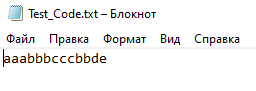

Первая строка - текст

## file_with_info_2

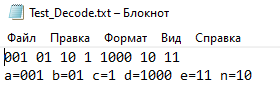

Первая строка - шифр
Вторая строка - кодировка

## file_with_info_3

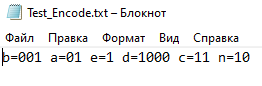

Первая строка - кодировка

## file_with_info_4

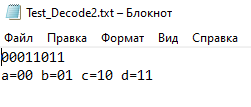

Первая строка - шифр
Вторая строка - кодировка


In [108]:
# Проверка декодирования из одного файла
SFED.get_code_and_encoding_to_decode(file_with_info_2)
SFED.visualize_information()

   Частота Код символа
a        1         001
b        1          01
c        1           1
d        1        1000
e        1          11
n        2          10
001 01 10 1 1000 10 11
abncdne


In [109]:
# Проверка декодирования из двух файлов
SFED.get_code_and_encoding_to_decode(file_with_info_2, file_with_info_3)
SFED.visualize_information()

   Частота Код символа
b        1         001
a        1          01
e        1           1
d        1        1000
c        1          11
n        2          10
001 01 10 1 1000 10 11
banednc


In [110]:
# Проверка кодирования с минимальной длинной кода символа = 8
SFED.get_file_to_encode(file_with_info_1, code_minimal_length=8)
SFED.visualize_information()

   Частота Код символа
b        5    00000011
a        3    00000010
c        3    00000001
d        1    00000001
e        1    00000000
00000010 00000010 00000010 00000011 00000011 00000011 00000001 00000001 00000001 00000011 00000011 00000001 00000000
aaabbbcccbbde


In [111]:
# Проверка кодирования с записью результата в файл
SFED.get_text_to_encode("aaabbbcccddeefgh", result_file_path=result_file)
SFED.visualize_information()

   Частота Код символа
a        3         111
b        3         110
c        3          10
d        2         011
e        2         010
f        1        0011
g        1        0010
h        1         000
111 111 111 110 110 110 10 10 10 011 011 010 010 0011 0010 000
aaabbbcccddeefgh


In [112]:
# Проверка работы максимальной длинны кода
SFED.get_text_to_encode("aaabbbcccddeefgh", code_maximal_length=3)

Error, maximal code length exceeded


In [113]:
# Проверка декодера для информации без отступов
SFED.get_code_and_encoding_to_decode(file_with_info_4, code_length=2)
SFED.visualize_information()

   Частота Код символа
a        1          00
b        1          01
c        1          10
d        1          11
00 01 10 11
abcd
